In [ ]:
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
!curl -s https://course.fast.ai/setup/colab 13 | bash
!pip uninstall torch torchvision -y
!pip install torch==1.4.0 torchvision==0.5.0

bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE html>'
Uninstalling torch-1.7.0+cu101:
  Successfully uninstalled torch-1.7.0+cu101
Uninstalling torchvision-0.8.1+cu101:
  Successfully uninstalled torchvision-0.8.1+cu101
     |████████████████████████████████| 753.4MB 21kB/s 
     |████████████████████████████████| 4.0MB 52.3MB/s 


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.callbacks import *

In [3]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [4]:
path=Path('/content/drive/MyDrive/Candlesticks/Candle Data/')
path_save=Path('/content/drive/MyDrive/Candlesticks/Processed/')

In [5]:
path.ls()

[PosixPath('/content/drive/MyDrive/Candlesticks/Candle Data/Up'),
 PosixPath('/content/drive/MyDrive/Candlesticks/Candle Data/Down'),
 PosixPath('/content/drive/MyDrive/Candlesticks/Candle Data/models')]

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, valid_pct=0.2,
        ds_tfms=get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.,max_rotate=3), size=224, num_workers=4).normalize(imagenet_stats)

In [8]:
data = ImageDataBunch.from_folder(path, valid_pct=0.2,
        ds_tfms=get_transforms(flip_vert=False, max_lighting=0.1, max_zoom=1.05, max_warp=0.,max_rotate=3), size=352, num_workers=4).normalize(imagenet_stats)

In [9]:
data.classes

['Down', 'Up']

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fit_one_cycle(10,max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.795778,0.690431,0.445438,1:18:17
1,0.794370,0.690927,0.444007,07:17
2,0.768986,0.685163,0.446869,07:24
3,0.740367,0.686158,0.445080,07:34
4,0.725505,0.683628,0.449553,07:45
5,0.711859,0.681729,0.442576,07:41
6,0.708334,0.680461,0.439177,07:41
7,0.699735,0.680808,0.441145,07:46
8,0.701592,0.680598,0.442039,07:45
9,0.705397,0.680415,0.444007,07:35


In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


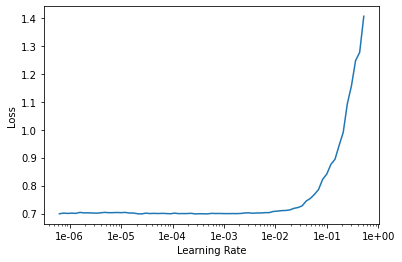

In [ ]:
learn.recorder.plot()

In [ ]:
learn.save('First colab Model')

In [ ]:
learn.load('First colab Model')

Learner(data=ImageDataBunch;

Train: LabelList (22363 items)
x: ImageList
Image (3, 352, 352),Image (3, 352, 352),Image (3, 352, 352),Image (3, 352, 352),Image (3, 352, 352)
y: CategoryList
Up,Up,Up,Up,Up
Path: /content/drive/MyDrive/Candlesticks/Candle Data;

Valid: LabelList (5590 items)
x: ImageList
Image (3, 352, 352),Image (3, 352, 352),Image (3, 352, 352),Image (3, 352, 352),Image (3, 352, 352)
y: CategoryList
Up,Down,Up,Down,Down
Path: /content/drive/MyDrive/Candlesticks/Candle Data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(6

epoch,train_loss,valid_loss,error_rate,time
0,0.696990,0.680349,0.441503,07:30


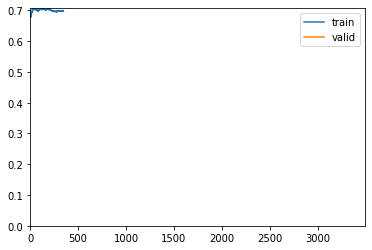

/usr/local/lib/python3.6/dist-packages/fastai/callbacks/tracker.py:50: UserWarning: <class 'fastai.callbacks.tracker.SaveModelCallback'> conditioned on metric `error rate` which is not available. Available metrics are: train_loss, valid_loss, error_rate
  warn(f'{self.__class__} conditioned on metric `{self.monitor}` which is not available. Available metrics are: {", ".join(map(str, self.learn.recorder.names[1:-1]))}')


KeyboardInterrupt: ignored

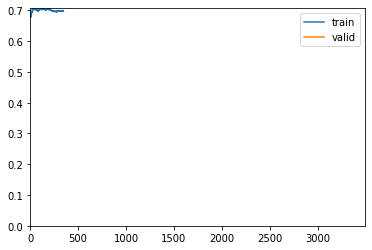

In [ ]:
learn.fit_one_cycle(10,max_lr=slice(1e-5,1e-4), callbacks=[ShowGraph(learn), SaveModelCallback(learn, monitor='error rate', mode='min', name='First colab Model')])

In [11]:
learn.load('First colab Model')

Learner(data=ImageDataBunch;

Train: LabelList (22363 items)
x: ImageList
Image (3, 352, 352),Image (3, 352, 352),Image (3, 352, 352),Image (3, 352, 352),Image (3, 352, 352)
y: CategoryList
Up,Up,Up,Up,Up
Path: /content/drive/MyDrive/Candlesticks/Candle Data;

Valid: LabelList (5590 items)
x: ImageList
Image (3, 352, 352),Image (3, 352, 352),Image (3, 352, 352),Image (3, 352, 352),Image (3, 352, 352)
y: CategoryList
Down,Up,Up,Up,Up
Path: /content/drive/MyDrive/Candlesticks/Candle Data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, e

In [12]:
correcti=0
list_down=[]
list_up=[]
for i in range(len(data.valid_ds)):
    prediction=learn.predict(data.valid_ds[i][0])
    if str(data.valid_ds[i][1])=="Down" and bool(prediction[1]==0) :
        correcti=correcti+1
        if prediction[2][0] >= 0.75 :
            list_down=list_down + [i]
            #print(prediction)
            #print()
    if str(data.valid_ds[i][1])=="Up" and bool(prediction[1]==1) :
        correcti=correcti+1
        if prediction[2][1] >= 0.75 :
            list_up=list_up + [i]
            #print(prediction)
            #print()
        

In [13]:
len(list_down),len(list_up)

(15, 0)

Up


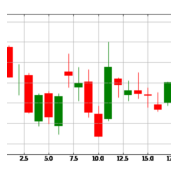

In [24]:
idx=1
x,y = data.valid_ds[idx]
x.show()
print(data.valid_ds.y[idx])

In [25]:
xb,_ = data.one_item(x)
xb_im = Image(data.denorm(xb)[0])
xb = xb.cuda()

In [26]:
m = learn.model.eval()

In [27]:
from fastai.callbacks.hooks import *

In [28]:
def hooked_backward(cat=y):
    with hook_output(m[0]) as hook_a: 
        with hook_output(m[0], grad=True) as hook_g:
            preds = m(xb)
            preds[0,int(cat)].backward()
    return hook_a,hook_g

In [29]:
hook_a,hook_g = hooked_backward()

In [30]:
acts  = hook_a.stored[0].cpu()
acts.shape

torch.Size([512, 11, 11])

In [31]:
avg_acts = acts.mean(0)
avg_acts.shape

torch.Size([11, 11])

In [32]:
def show_heatmap(hm):
    fig,ax = plt.subplots()
    xb_im.show(ax)
    ax.imshow(hm, alpha=0.6, extent=(0,352,352,0),
              interpolation='bilinear', cmap='magma');
    return fig

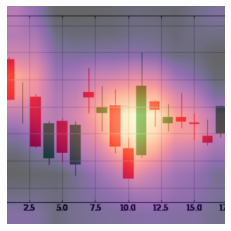

In [33]:
answer=show_heatmap(avg_acts)
answer.savefig(path/'trial.png')